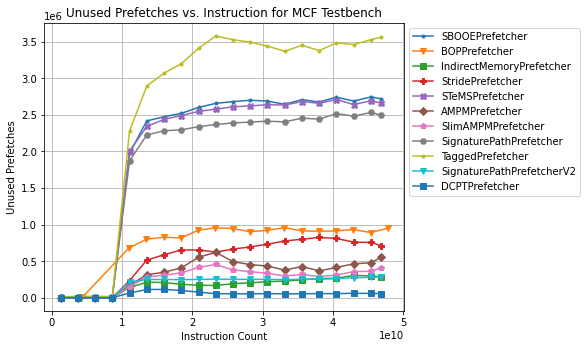

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from matplotlib.figure import Figure
NUM = 50
markers = [".", "v", "s", "P", "X", "D", "p", "H"]
def array_thinnerY(big_list):
    old_length = len(big_list)
    new_length = int(old_length / NUM)
    thin_list = []
    for i in range(old_length):
        if i % NUM == 0:
            if i != 0:
                thin_list.append(group_sum)
            group_sum = 0
        else:
            group_sum += big_list[i]
    if group_sum > 0:
        thin_list.append(group_sum)
    return thin_list

def array_thinnerX(big_list):
    old_length = len(big_list)
    new_length = int(old_length / NUM)
    thin_list = []
    for i in range(old_length):
        if i % NUM == NUM - 1:
            thin_list.append(big_list[i])
    return thin_list

results = glob("./results/*mcf*")
fig = plt.figure(figsize = (5, 4))

# Adding the axes to the figure
ax = fig.add_axes([1, 1, 1, 1])
prefetchers = []
marker_pos = 0
for result in results:

    prefetcher = result.split("/")[-1].split(".")[-2].split("-")[0]
    prefetchers.append(prefetcher)
    dataframe = pd.read_csv(result)
    # x-axis Instruction
    x_data = array_thinnerY(dataframe["Instruction"].to_list())
    # y-axis pfIssued
    y_data = array_thinnerY(dataframe["unusedPrefetches"].to_list())
    # plt.plot(x_data, y_data, marker='o')
    # plt.text(x_data[-1], y_data[-1], prefetcher)
    # plotting 1st dataset to the figure
    marker = markers[marker_pos % len(markers)]
    marker_pos += 1
    ax1 = ax.plot(x_data, y_data, marker=marker)
ax.set_xlabel("Instruction Count")
ax.set_ylabel("Unused Prefetches")
 
# Adding Legend
ax.legend(labels = prefetchers, bbox_to_anchor=(1, 1))
ax.set_title("Unused Prefetches vs. Instruction for MCF Testbench")
ax.grid()